In [88]:
import pandas as pd

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold


In [89]:
song_data=pd.read_csv("fma-rock-vs-hiphop.csv")
feature_data=pd.read_csv("echonest-metrics.csv")

In [90]:
song_data.head(10)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]","[58, 12, 45]",NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]","[58, 12, 45]",NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],"[25, 12]",NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],"[25, 12]",NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],"[26, 12]",NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
5,154,256000,0,Arc and Sender,2008-11-26 01:45:04,2008-11-26 00:00:00,319,1,Rock,[26],"[26, 12]",NaN,242,en,Attribution-NonCommercial-NoDerivatives (aka M...,205,NaN,4,NaN,[],Squares And Circles
6,155,192000,0,NaN,2008-11-26 01:45:10,2008-11-26 00:00:00,756,1,Rock,[26],"[26, 12]",NaN,268,en,Attribution-NonCommercial-NoDerivatives (aka M...,197,NaN,0,NaN,[],Maps of the Stars Homes
7,169,192000,0,James Squeaky,2008-11-26 01:46:02,2006-01-01 00:00:00,144,1,Rock,[25],"[25, 12]",NaN,815,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,270,NaN,1,NaN,[],Boss of Goth
8,170,192000,0,NaN,2008-11-26 01:46:05,2006-10-07 00:00:00,181,0,Rock,[25],"[25, 12]",NaN,468,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,122,NaN,2,NaN,[],Industry Standard Massacre
9,171,320000,0,NaN,2008-11-26 01:46:07,2008-11-26 00:00:00,80,0,Rock,[25],"[25, 12]",<p>Unreleased</p>,582,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,242,NaN,2,NaN,[],Marching as Technitions


In [91]:
feature_data.head(10)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
5,139,0.106550,0.260911,0.607067,0.835087,0.223676,0.030569,196.961,0.160267
6,140,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991
7,141,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,33.477,0.163950
8,142,0.662881,0.379065,0.823856,0.910266,0.088705,0.079090,147.781,0.092868
9,144,0.909011,0.443643,0.641997,0.924092,0.267669,0.089659,128.537,0.788251


In [92]:
echo_track=feature_data.merge(song_data[['track_id','genre_top']], left_on='track_id', right_on = 'track_id')
echo_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [93]:
corr_metrices=echo_track.drop(["genre_top"],axis=1).corr()
corr_metrices.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [94]:
from sklearn.model_selection import train_test_split
x=echo_track.drop(['track_id','genre_top'],axis=1)
y=echo_track['genre_top']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns

In [97]:
pca=PCA()
pca.fit(x_train_scaled)
exp_variance=pca.explained_variance_ratio_

echo_track.shape

(4802, 10)

<BarContainer object of 8 artists>

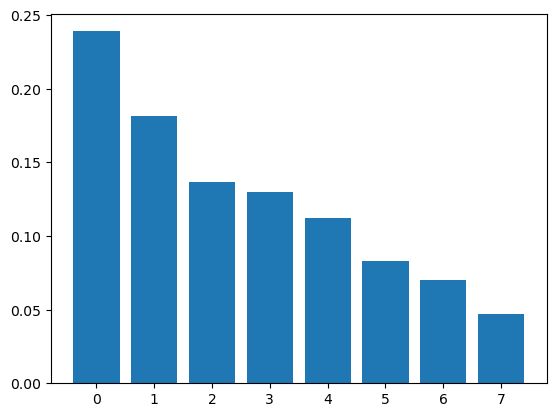

In [98]:
fig,ax=plt.subplots()   
ax.bar(range(pca.n_components_),exp_variance)      


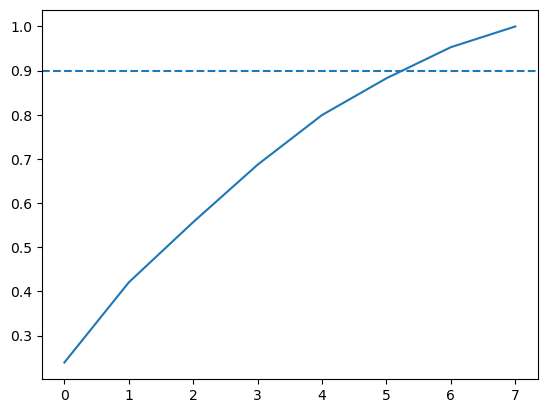

In [99]:
import numpy as np
cum_exp_vari=np.cumsum(exp_variance)

fig,ax=plt.subplots()
ax.plot(cum_exp_vari)
ax.axhline(y=.90,linestyle='--')

In [100]:
pca=PCA(n_components=6,random_state=10)


In [101]:
train_pca=pca.fit_transform(x_train_scaled)
test_pca=pca.transform(x_test_scaled)

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
tree=DecisionTreeClassifier(random_state=10)
tree.fit(train_pca,y_train)
pred_y=tree.predict(test_pca)

In [104]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=10)
log_reg.fit(train_pca,y_train)
pred_y_logreg=log_reg.predict(test_pca)



In [108]:
from sklearn.metrics import classification_report
class_report_tree=classification_report(y_test,pred_y)
class_report_lin_reg=classification_report(y_test,pred_y_logreg)

print("Decision Tree: \n", class_report_tree)
print("Logistic Regression: \n", class_report_lin_reg)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.63      0.62      0.62       235
        Rock       0.91      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.85      0.85      0.85      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



In [111]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
tree_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                      ("tree", DecisionTreeClassifier(random_state=10))])
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("logreg", LogisticRegression(random_state=10))])

kf = KFold(10)
tree_score = cross_val_score(tree_pipe, x, y, cv=kf)
logit_score = cross_val_score(logreg_pipe, x, y, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.8442182085932085 Logistic Regression: 0.8660624566874567
